# Числовые функции и численное дифференцирование: программная реализация, ОО подход

In [4]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=20)

In [5]:
def Derivative(f, x, h=1e-4):
    return (f(x + h) - f(x))/float(h)

## Представление функции с параметрами в виде класса
Пример с вертикальным движением тела в поле силы тяжести: $y(t) = v_0 t - \frac{g t^2}{2}$. В качестве параметров возьмем $v_0$ и $g$. Каким образом лучше реализовать данную функцию? 

__Очевидное решение__: функция нескольких аргументов.

In [6]:
def YVertical(t, v0, g):
    return v0*t - 0.5*g*(t**2)

Однако при проведении численного дифференцирования данной функции возникнет проблема, так как функции взятия производной в качестве аргумента требуется функция 1 переменной.

К сожалению, функция Derivative() не сможет работать с нашей YVertical.


__Неудачное решение__: использование глобальных переменных.

In [7]:
g = 9.8 
x0 = 0.1 # случайная значение
v0 = 5.2 # случайное значение

def YVertical1(t):
    return v0*t - 0.5*g*(t**2)

Как известно, использование глобальных переменных требуется сводить к минимуму с целью избегания ошибок из-за путаницы в именах в различных областях видимости.

__Еще способ__: Для каждого значения параметра v0 можно написать отдельную функцию (еще неудачней). Написание же n-го количества версий первой для функций с количеством аргументов от 1 до n  представляется не очень оптимальным решением данной задачи. Мы же стремимся к написанию ПО, работающему в самых общих случаях.

Как решить проблему? Использовать __классы__. Переменные класса видны всем его методам, поэтому в контексте класса их можно рассматривать в качестве "глобальных":

In [8]:
class YVertical:
    def __init__(self, v0):
        self._g = 9.81
        self._v0 = v0
        
    #def SetInitialVelocity(self, v0):
    #    self._v0 = v0
        
    def Evaluate(self, t):
        return self._v0*t - 0.5*self._g*(t**2)

In [9]:
# использование
ball = YVertical(v0)
#ball.SetInitialVelocity(v0)
print(ball.Evaluate(x0))

0.47095


Итак, для представления функции n переменных $ f \left( x; p_1, ..., p_n \right) $, часть которых можно считать параметрами в контексте использования функции в программе, создаем класс:

 


In [10]:
# набросок: класс для функции с n-параметрами
class MyFunction:
    
    def __init__(self, p1, p2, pn):
        self._p1 = p1
        self._p2 = p2
        self._pn = pn
    
    '''
    def SetP1(self, p1):
        self._p1 = p1
        
    def SetP2(self, p2):
        self._p2 = p2
        
    #....................
    
    def SetPn(self, pn):
        self._pn = pn
    '''
    
    def Evaluate(self, x):
        return <smth>

SyntaxError: invalid syntax (<ipython-input-10-0429a2abd9bf>, line 23)

Для большего удобства использования класса в качестве функции, вместо конструкции __object.Evaluate(x)__ хочется использовать более привычную операцию вызова функции __object(x)__. В языке С++ для этого существует __перегрузка операторов__, позволяющая переопределять многие стандартные операторы "()", "+", "-", " * ", "/" и.т.д. В языке Python эту роль на себя берут т.н. __магические методы__.


Используем один из них в классе для функции:

In [13]:
# набросок для функции с n-параметрами
class MyFunction:
    
    def __init__(self, p1, p2, pn):
        self._p1 = p1
        self._p2 = p2
        self._pn = pn
    
    '''
    def SetP1(self, p1):
        self._p1 = p1
        
    def SetP2(self, p2):
        self._p2 = p2
        
    #....................
    
    def SetPn(self, pn):
        self._pn = pn
    '''

    def __call__(self, x): # "заменяет" функцию Evaluate(x) 
        return <smth>      # object(x) - это то же самое, что вызов object.__self(x)__

SyntaxError: invalid syntax (<ipython-input-13-d37d482914ca>, line 23)

Итак, еще раз:

In [15]:
class YVertical:
    def __init__(self, v0):
        self._g = 9.81
        self._v0 = v0
        
    #def SetInitialVelocity(self, v0):
    #    self._v0 = v0
        
    def __call__(self, t):
        return self._v0*t - 0.5*self._g*(t**2)

In [17]:
# использование
Y1 = YVertical(v0)
#Y1.SetInitialVelocity(v0)
print(Y1(x0))

0.47095


Объекты, в которых методом __--call--__() перегружена операция "()"  называются __функциональными объектами__ или сокращенно __функторами__.

## Магические методы
Их имеется довольно большое количество:

* __--init--__(self)
Конструктор

* __--del--__(self) 
Деструктор

* __--pos--__(self)
Определяет поведение для унарного плюса (+some_object)


* __--neg--__(self)
Определяет поведение для отрицания (-some_object)


* __--abs--__(self)
Определяет поведение для встроенной функции abs().


* __--invert--__(self)
Определяет поведение для инвертирования оператором ~.


* __--round--__(self, n)
Определяет поведение для встроенной функции round(). n это число знаков после запятой, до которого округлить.


* __--floor--__(self)
Определяет поведение для math.floor(), то есть, округления до ближайшего меньшего целого.


* __--ceil--__(self)
Определяет поведение для math.ceil(), то есть, округления до ближайшего большего целого.

.........................

## Автоматическое дифференцирование функций.
Рассмотрим различные способы реализации операции дифференцирования. 

__1-й способ__:

In [18]:
def Derivative(f, x, h=1e-4):
    return (f(x + h) - f(x - h))/ (2.*float(h))

In [19]:
# использование
TestFunction = lambda x: (x**3)*np.sin(x)
print (Derivative(TestFunction, x0))

0.0039900106314


__2-й способ__: функция, возвращающая функцию (т.н. __замыкание__). __Замыкание__ (англ. closure) — функция, в теле которой присутствуют ссылки на переменные, объявленные вне тела этой функции в окружающем коде и не являющиеся её параметрами.

In [20]:
def Derivative(f, h=1e-4):
    
    def DfDx(x):
        return (f(x + h) - f(x - h))/(2.*h)
        
    return DfDx # это замыкание помнит значение внешних переменных f и h

In [21]:
Derivative1 = Derivative(TestFunction) # теперь Derivative_1 ведет себя как обыкновенная функция
print(Derivative1(x0))

0.0039900106314


__3-й способ__: написание отдельного класса, способного вызывать функцию и хранить её состояние в полях.

In [24]:
# класс, реализующий формулу численного дифференцирования
class Derivative:
    
    def __init__(self, f, h):
        self._f = f
        self._h = h
    
    #def SetFunction(self, f):
    #    self._f = f
        
    #def SetStep(self, h):
    #    self._h = h

    def __call__(self, x):
        f, h = self._f, self._h
        return (f(x + h) - f(x - h))/(2.*h)

In [25]:
# тестирование
derivative1 = Derivative(f=TestFunction, h=1e-5)
#derivative1.SetFunction(TestFunction)
#derivative1.SetStep(1e-5)

print(derivative1(x0)) # теперь derivative1 ведет себя как обыкновенная функция

0.00399000670435


__В дальнейшем будем использовать последний способ__. Перейдем к использованию класса: протестируем его на различных функциях.

Возвращаясь к обычным функциям: напоминаю, что всё в Python является объектом, в том числе и функция. Т.е. ее тоже можно рассматривать как функциональный объект, что позволяет взаимодействовать с ней как с обыкновенной переменной (помещать в списки, к примеру). В языке С для реализации массива из функций пришлось бы использовать указатели на функции, что порождает множество сложностей, если эти функции имеют различное число аргументов и различные возвращаемые значения [ пример объявления указателя: __int (*ptrToFunction)(float, char, char);__ ].

Для оценки погрешности численного дифференцирования потребуются аналитические значения производных, которые получим с помощью библиотеки SymPy:

In [28]:
import sympy as smp
xSym = smp.Symbol('x') # импортируем символ переменной для использования символьными функциями

# символьные функции требуют явного указания аргумента (в отличие от "численных" из библиотеки math)
listOfSymbolicFunctions = [smp.sin(xSym), smp.cos(xSym), smp.exp(xSym), smp.tan(xSym)] 

# генерируем "численные" функции из символьных: этим занимается функция lambdify
listOfFunctions = [smp.lambdify(xSym, f) for f in listOfSymbolicFunctions]

# используем написанный класс
h0 = 1e-5
listOfNumericalDerivatives = []

for f in listOfFunctions:
    listOfNumericalDerivatives.append(Derivative(f, h0))
    #listOfNumericalDerivatives[-1].SetFunction(f)
    #listOfNumericalDerivatives[-1].SetStep(h0)


print (listOfSymbolicFunctions, '\n\n', listOfFunctions) # смотрим, что за объекты

[sin(x), cos(x), exp(x), tan(x)] 

 [<function <lambda> at 0x112749d08>, <function <lambda> at 0x112773b70>, <function <lambda> at 0x112773d08>, <function <lambda> at 0x10e052ae8>]


Построение графиков производных

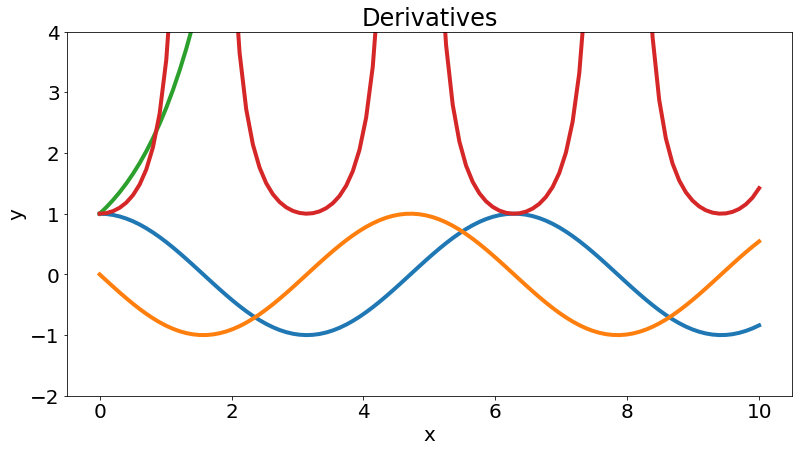

In [36]:
xLeft, xRight = 0., 10.
numPoints = 100
xData = np.linspace(xLeft, xRight, numPoints)
yDataList = []


figureSizeConst = (13, 6.7) # в дюймах
plt.figure(figsize=figureSizeConst) # строим графики производных в общем окне
plt.title('Derivatives')

for function, derivative in zip(listOfFunctions, listOfNumericalDerivatives):   
    yData = derivative(xData) # векторизованная операция над массивом xData
    yDataList.append(yData)
    
    plt.plot(xData, yData, '-', linewidth = 4)
    #plt.grid('on')

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2., 4.])
plt.show()

### Анализ сходимости

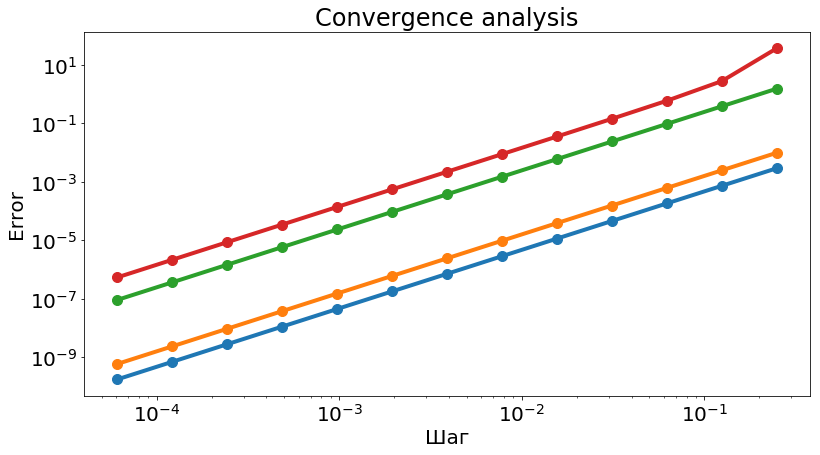

In [35]:
# символьное дифференцирование; используем генераторы списков
listOfAnalyticalDerivatives = [smp.lambdify(xSym, smp.diff(f, xSym)) \
                               for f in listOfSymbolicFunctions]
#listOfAnaliticalDerivatives = [smp.lambdify(xSym, f) for f in listOfSymbolicDerivatives]

# построение зависимости погрешностей формул численного дифференцирования от величины шага 
x0 = 5.
listOfSteps = [2**(-n) for n in range(2, 15)]


plt.figure(figsize=figureSizeConst)
plt.title('Convergence analysis')
for function, analyticalDerivative in zip(listOfFunctions, listOfAnalyticalDerivatives):
    
    numericalDerivative = Derivative(function, np.array(listOfSteps))
    #numericalDerivative.SetFunction(function)
    
    # передаем массив шагов h для вычисления производной в векторизованном формате
    #numericalDerivative.SetStep(np.array(listOfSteps))
    
    # векторизованные вычисления производной, модуля разности 
    listOfErrors = np.fabs(numericalDerivative(x0) - analyticalDerivative(x0))
    
    plt.loglog(listOfSteps, listOfErrors, '-o', linewidth=4, markersize=10)
    #plt.legend()

#plt.grid('on')
#plt.xlabel('Step')
plt.xlabel('Шаг')
plt.ylabel('Error')
plt.show()

## Вопросы?